In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import healpy as hp

In [2]:
names = ['hpid', 'mag', 'airmass', 'mjd', 'filter']
types = [int,float,float,float,'|S1']
data = np.loadtxt('xy2sky.txt', dtype=zip(names,types))

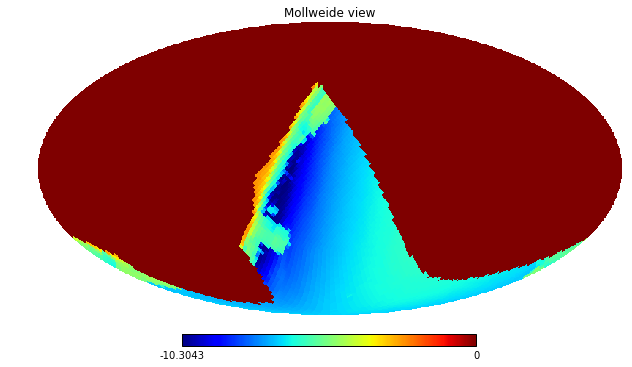

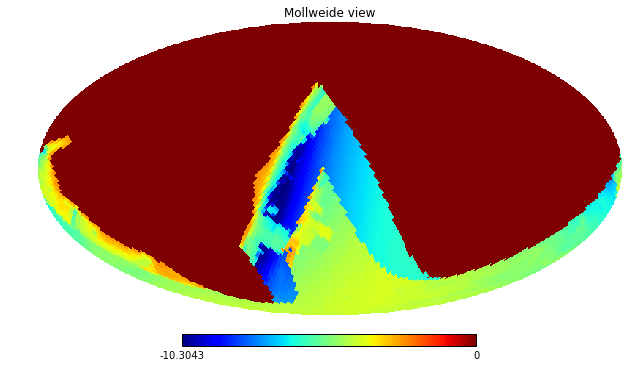

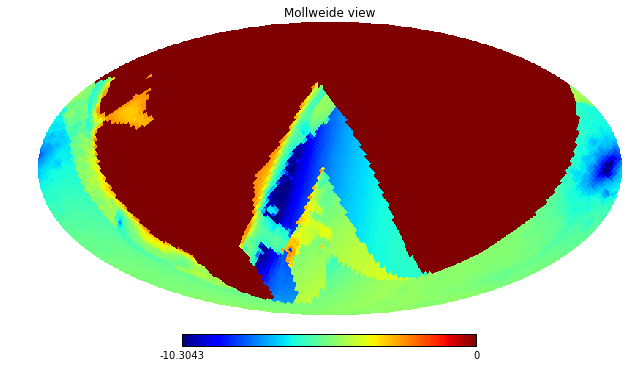

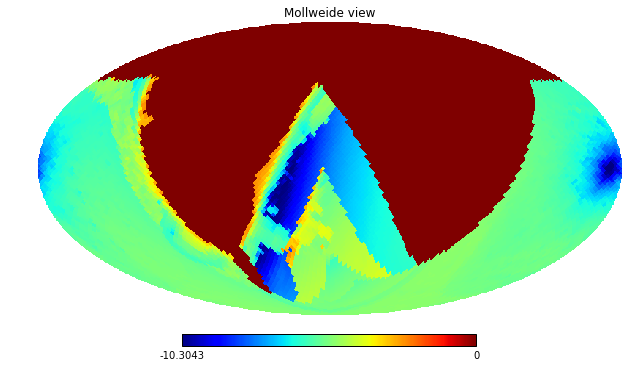

In [8]:
umjd = np.unique(data['mjd'])
nside = 32
skymap = np.zeros(hp.nside2npix(nside))
for i in [1,100,200, 300]:
    good = np.where(data['mjd'] == umjd[i])
    skymap[data['hpid'][good]] = data['mag'][good]
    hp.mollview(skymap)

In [5]:
umjd.size

446